<a href="https://colab.research.google.com/github/Cmte-Kirk/DataScience_7DaysOfCode/blob/main/Classificacao_roupas/Classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo para classificação de tipos de roupas.
Importações

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregar dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Explorar dados

In [3]:

print(len(imagens_treino))

print(imagens_treino.shape)
print(imagens_teste.shape)

print(identificacoes_treino.shape)
print(identificacoes_teste.shape)

print(identificacoes_treino.min())
print(identificacoes_treino.max())

60000
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
0
9


### Exibir dados

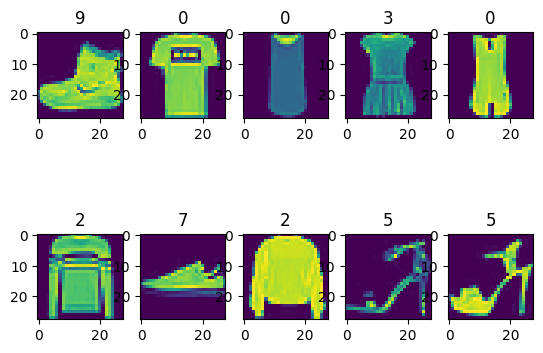

In [4]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1) # cria um grid com sub imagens de 2x5
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

Criando uma lista e traduzindo os índices para nomes

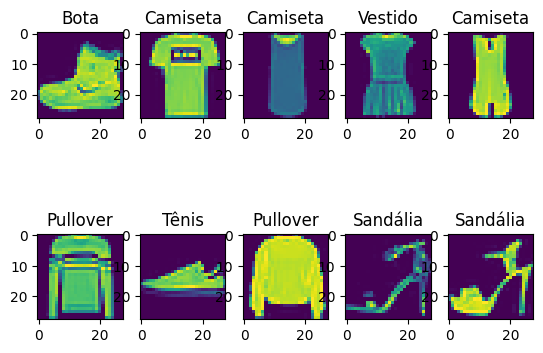

In [5]:
total_classificacoes = 10
nomes_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                        'Vestido', 'Casaco', 'Sandália', 'Camisa',
                        'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1) # cria um grid com sub imagens de 2x5
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[identificacoes_treino[imagem]])


Exibindo imagem com escala de cores de 0 .. 256

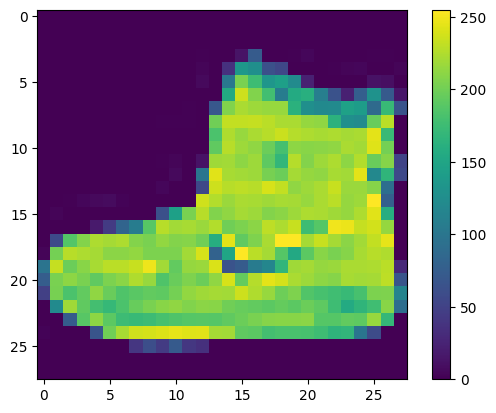

In [6]:
plt.imshow(imagens_treino[0])
plt.colorbar()

Normalização das cores da imagem da escala de 1..256 inteiro, para frações de 0..1.

In [7]:
imagens_treino = imagens_treino/255.0 # Normalização


Exibição da imagem com a nova escala de cores.

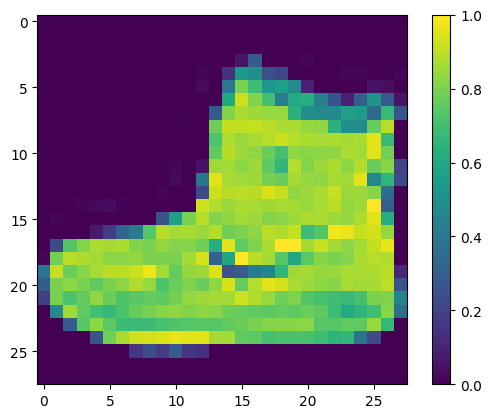

In [8]:
plt.imshow(imagens_treino[0])
plt.colorbar()

Criando o modelo e suas camadas no Keras, este modelo possui uma camada de entrada e 3 camadas de processamento.

A camada de entrada possui 28x28 = 784 nós para reconhecer cada pixel da imagem.

A camada deensa possui 256 nós com a função ReLU

A camada Dropout deixa alguns nós da camada densa adormecidos.

A ultima camada densa com a função softmax, é a camada de saída e possui 10 nós que resulta na classificação das 10 categorías.

In [12]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #entrada, fatiando e array e achatando em um vetor unidimenssional
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

Compilação e treino do modelo.

In [14]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics='accuracy')
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5242 - accuracy: 0.8142 - val_loss: 0.4058 - val_accuracy: 0.8537
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3987 - accuracy: 0.8562 - val_loss: 0.3656 - val_accuracy: 0.8653
Epoch 3/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3644 - accuracy: 0.8664 - val_loss: 0.3416 - val_accuracy: 0.8774
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3383 - accuracy: 0.8747 - val_loss: 0.3486 - val_accuracy: 0.8754
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3228 - accuracy: 0.8800 - val_loss: 0.3285 - val_accuracy: 0.8815


Salvando o arquivo do modelo.

In [15]:
modelo.save('modelo_modelo_salvo5_nos3.h5')

Lendo o arquivo de modelo já salvo

In [16]:
modelo_salvo = load_model('modelo_modelo_salvo5_nos3.h5')

Grafico de Acurácia por épocas

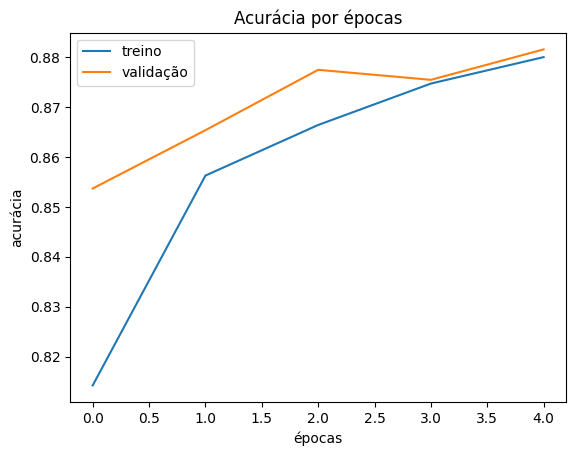

In [21]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Grafico de perdas por épocas

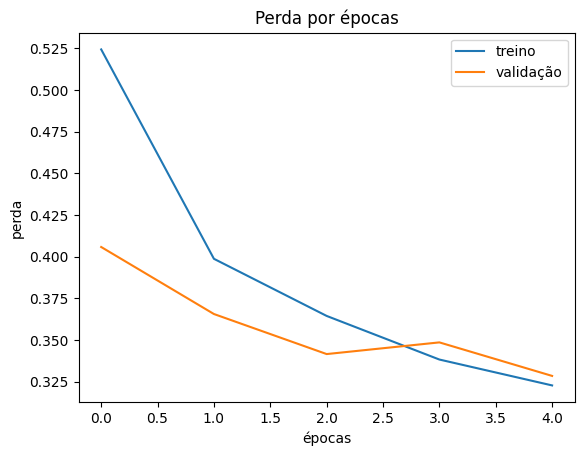

In [22]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Fazendo alguns testes.

In [19]:
testes = modelo_salvo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('numero da imagem do teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 3ms/step
resultado teste: 2
numero da imagem do teste: 2


Calculando a perda e acurácia da amostra de teste.

In [20]:
perda_teste, acuracia_teste = modelo_salvo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 48.6370 - accuracy: 0.8548
Perda do teste: 48.63702392578125
Acurácia do teste: 0.8547999858856201
